In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
plt.rcParams["lines.linewidth"] = 4
plt.rcParams["lines.markersize"] = 10
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['axes.labelsize'] = 'x-large'

# The Bayesian Optimisation Loop

In [2]:
from skopt import Optimizer
from skopt.space import Space
from skopt.utils import cook_estimator
from utils import plot_optimizer


x = np.linspace(-2, 2, 400).reshape(-1, 1)
noise_level = 0.1

# Our 1D toy problem, this is the function we are trying to
# minimize
def objective(x, noise_level=noise_level):
    return np.sin(5 * x[0]) * (1 - np.tanh(x[0] ** 2)) + np.random.randn() * noise_level

In [3]:
# setup the dimensions of the space, the surrogate model to use and plug it all together
# inside the optimizer
space = Space([(-2.0, 2.0)])
gp = cook_estimator("GP", space, noise='gaussian')

opt = Optimizer(space, gp, acq_func="EI", n_initial_points=3, acq_func_kwargs={'xi': 0.01})

In [4]:
# ask for a point, evaluate it, and tell the optimiser the value of the objective
# repeat three times
for _ in range(3):
    suggested = opt.ask()
    y = objective(suggested)
    opt.tell(suggested, y)

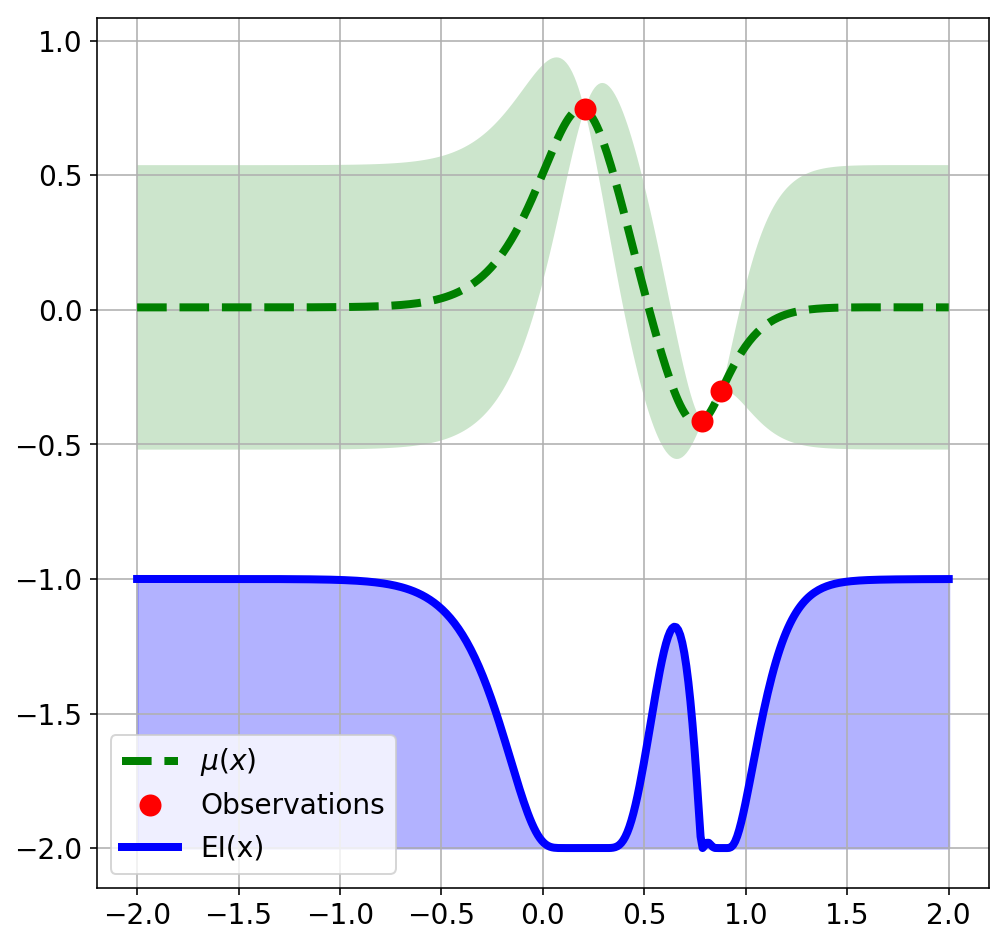

In [5]:
plot_optimizer(opt, x)

In [6]:
# three more points
for _ in range(3):
    suggested = opt.ask()
    y = objective(suggested)
    opt.tell(suggested, y)

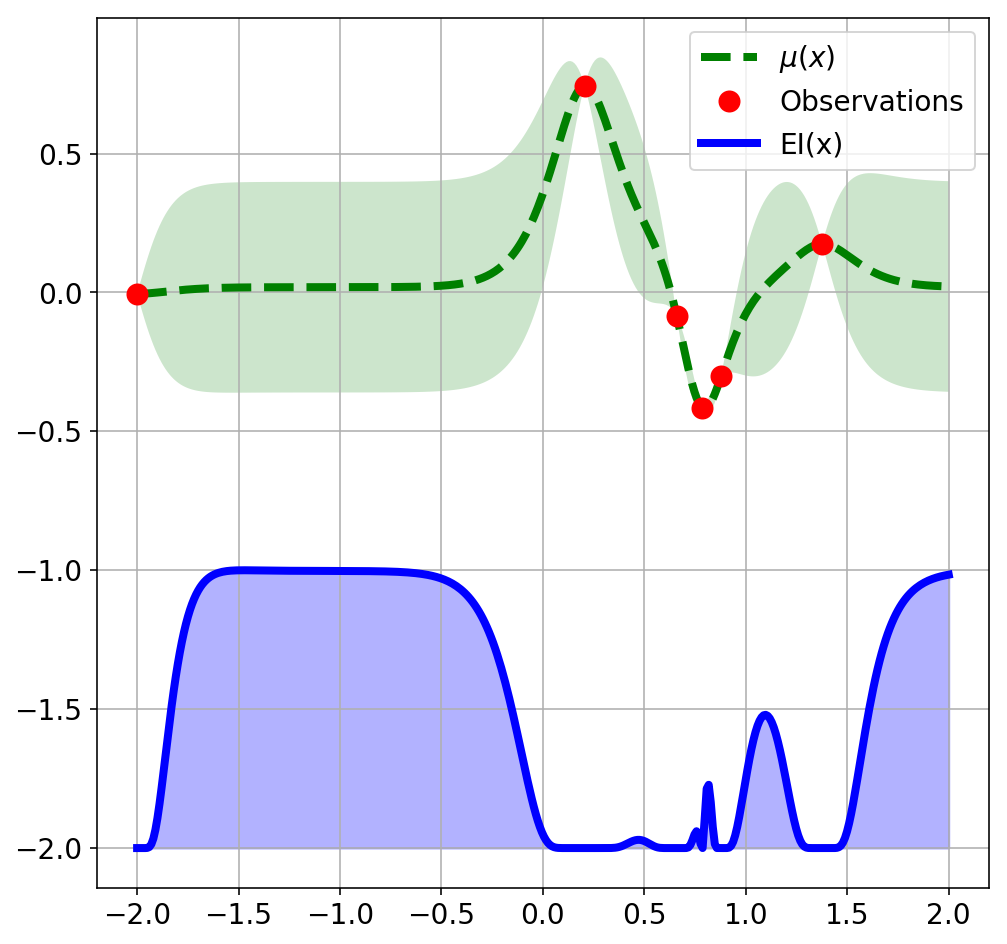

In [7]:
plot_optimizer(opt, x)

In [8]:
# ... and keep going and going
for _ in range(10):
    suggested = opt.ask()
    y = objective(suggested)
    opt.tell(suggested, y)

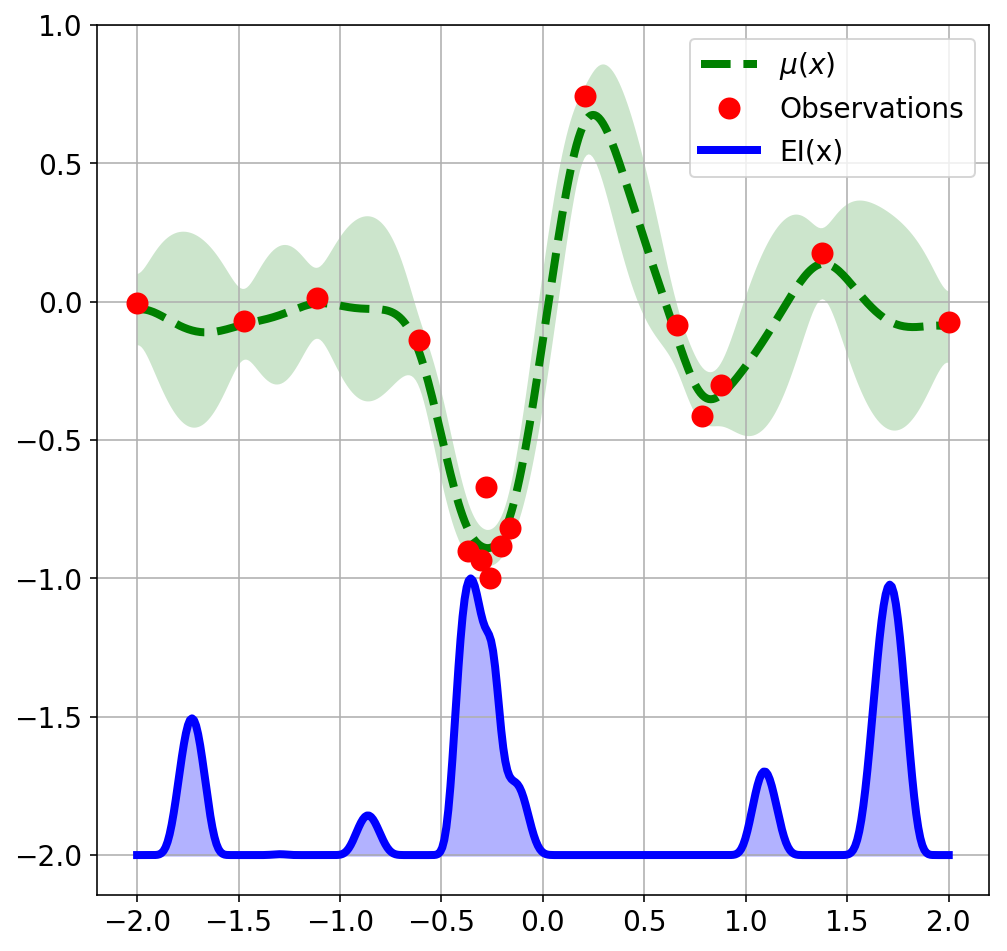

In [9]:
plot_optimizer(opt, x)